### Training a convnet from scratch on a small dataset

#### Copying images to training, validation, and test directories


In [1]:
import os, shutil

In [6]:
original_dataset_dir = '/home/ouser/kaggle'
base_dir = '/home/ouser/kaggle/cats_and_dogs_small'
os.mkdir(base_dir)


train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)




##### Copies the first 1,000 cat images to train_cats_dir

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + '/train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)


##### Copies the next 500 cat images to validation_cats_dir

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + '/train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

##### Copies the next 500 cat images to test_cats_dir

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + '/train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

##### Copies the first 1,000 dog images to train_dogs_dir

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + '/train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

##### Copies the next 500 dog images to validation_dogs_dir

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + '/train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

##### Copies the next 500 dog images to test_dogs_dir

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir + '/train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Building a network

#### Instantiating a small convnet for dogs vs. cats classification


In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### Configuring the model for training

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

#### Using ImageDataGenerator to read images from directories

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
data_batch[0]

array([[[0.9176471 , 0.81568635, 0.70980394],
        [0.909804  , 0.8078432 , 0.7019608 ],
        [0.909804  , 0.8078432 , 0.7019608 ],
        ...,
        [0.87843144, 0.7372549 , 0.63529414],
        [0.8980393 , 0.75294125, 0.64705884],
        [0.89019614, 0.7372549 , 0.62352943]],

       [[0.91372555, 0.8117648 , 0.7058824 ],
        [0.909804  , 0.8078432 , 0.7019608 ],
        [0.91372555, 0.8117648 , 0.7058824 ],
        ...,
        [0.8980393 , 0.7568628 , 0.654902  ],
        [0.909804  , 0.76470596, 0.6627451 ],
        [0.8941177 , 0.7372549 , 0.63529414]],

       [[0.92549026, 0.8078432 , 0.69803923],
        [0.9215687 , 0.80392164, 0.69411767],
        [0.9215687 , 0.80392164, 0.69411767],
        ...,
        [0.8745099 , 0.73333335, 0.64705884],
        [0.8941177 , 0.74509805, 0.654902  ],
        [0.8941177 , 0.7372549 , 0.6392157 ]],

       ...,

       [[0.94117653, 0.90196085, 0.86666673],
        [0.9450981 , 0.9058824 , 0.8705883 ],
        [0.9450981 , 0

#### Fitting the model using a batch generator

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6875 - acc: 0.5310 - val_loss: 0.6662 - val_acc: 0.5720
Epoch 2/30
100/100 [==============================] - 18s 175ms/step - loss: 0.6519 - acc: 0.6110 - val_loss: 0.6412 - val_acc: 0.6340
Epoch 3/30
100/100 [==============================] - 18s 177ms/step - loss: 0.6066 - acc: 0.6630 - val_loss: 0.6180 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 18s 175ms/step - loss: 0.5720 - acc: 0.6940 - val_loss: 0.5958 - val_acc: 0.6640
Epoch 5/30
100/100 [==============================] - 18s 176ms/step - loss: 0.5427 - acc: 0.7210 - val_loss: 0.5856 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 18s 180ms/step - loss: 0.5208 - acc: 0.7500 - val_loss: 0.5770 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 18s 180ms/step - loss: 0.4891 - acc: 0.7695 - val_loss: 0.5846 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 1

#### Saving the model

In [34]:
model.save('cats_and_dogs_small_1.h5')

In [8]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')


#### Displaying curves of loss and accuracy during training

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

#### Setting up a data augmentation configuration via ImageDataGenerator

In [37]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#### Displaying some randomly augmented training images

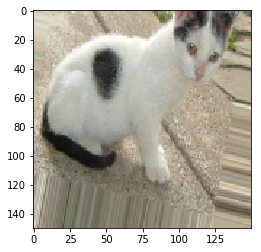

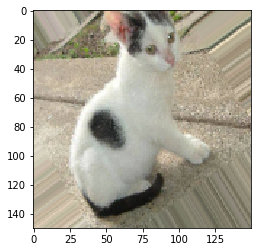

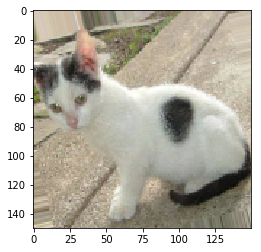

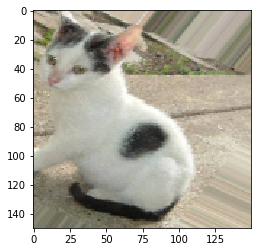

In [38]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

#### Defining a new convnet that includes dropout

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

#### Training the convnet using data-augmentation generators

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=32, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 40s 396ms/step - loss: 0.6935 - acc: 0.5084 - val_loss: 0.6814 - val_acc: 0.5470
Epoch 2/100
100/100 [==============================] - 37s 374ms/step - loss: 0.6810 - acc: 0.5606 - val_loss: 0.6948 - val_acc: 0.5210
Epoch 3/100
100/100 [==============================] - 38s 376ms/step - loss: 0.6655 - acc: 0.5994 - val_loss: 0.6814 - val_acc: 0.5520
Epoch 4/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6553 - acc: 0.6156 - val_loss: 0.6781 - val_acc: 0.5820
Epoch 5/100
100/100 [==============================] - 37s 370ms/step - loss: 0.6357 - acc: 0.6363 - val_loss: 0.6190 - val_acc: 0.6570
Epoch 6/100
100/100 [==============================] - 38s 385ms/step - loss: 0.6162 - acc: 0.6563 - val_loss: 0.6244 - val_acc: 0.6370
Epoch 7/100
100/100 [==============================] - 37s 373ms/step - loss: 0.5988 - acc: 0.6800 - val_loss: 0.5904 - val_acc: 0.6690
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 37s 373ms/step - loss: 0.3973 - acc: 0.8212 - val_loss: 0.4777 - val_acc: 0.8130
Epoch 62/100
100/100 [==============================] - 38s 381ms/step - loss: 0.4041 - acc: 0.8116 - val_loss: 0.4295 - val_acc: 0.8140
Epoch 63/100
100/100 [==============================] - 37s 374ms/step - loss: 0.4118 - acc: 0.8109 - val_loss: 0.4397 - val_acc: 0.8000
Epoch 64/100
100/100 [==============================] - 37s 374ms/step - loss: 0.4132 - acc: 0.8091 - val_loss: 0.4457 - val_acc: 0.7800
Epoch 65/100
100/100 [==============================] - 37s 374ms/step - loss: 0.3873 - acc: 0.8300 - val_loss: 0.5633 - val_acc: 0.7400
Epoch 66/100
100/100 [==============================] - 38s 377ms/step - loss: 0.3989 - acc: 0.8209 - val_loss: 0.4639 - val_acc: 0.8050
Epoch 67/100
100/100 [==============================] - 38s 376ms/step - loss: 0.3931 - acc: 0.8197 - val_loss: 0.4287 - val_acc: 0.8130
Epoch 68/100
100/100 [===================

#### Saving the model

In [42]:
model.save('cats_and_dogs_small_2.h5')

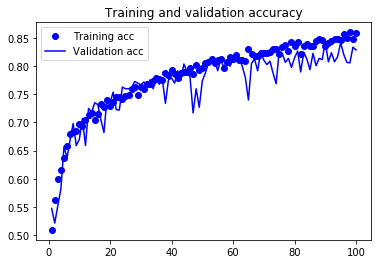

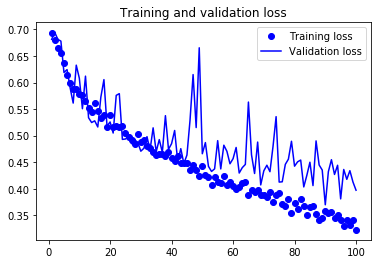

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Instantiating the VGG16 convolutional base

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### Extracting features using the pretrained convolutional base

In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


base_dir = '/home/ouser/kaggle/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150), 
                                            batch_size=batch_size, 
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
            
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000) 
validation_features, validation_labels = extract_features(validation_dir, 1000) 
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_features

array([[[[ 0.38032258, -0.        , -0.        , ..., -0.        ,
           0.71989638, -0.        ],
         [ 0.4464986 , -0.        , -0.        , ..., -0.        ,
           0.82973343, -0.        ],
         [ 0.95152622, -0.        , -0.        , ..., -0.        ,
           0.82598555, -0.        ],
         [ 1.18083501, -0.        , -0.        , ..., -0.        ,
           0.72031868, -0.        ]],

        [[ 0.31248868, -0.        , -0.        , ..., -0.        ,
           0.59142357, -0.        ],
         [ 0.38256735, -0.        ,  0.61488789, ..., -0.        ,
           0.40326807, -0.        ],
         [ 0.49482903, -0.        ,  0.55733436, ..., -0.        ,
          -0.        , -0.        ],
         [ 0.83120668, -0.        ,  0.14897083, ..., -0.        ,
           0.2325764 , -0.        ]],

        [[ 0.05957741, -0.        , -0.        , ..., -0.        ,
           0.61867052, -0.        ],
         [ 0.26689053, -0.        ,  0.57243276, ..., -0.   

In [6]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

#### Defining and training the densely connected classifier

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 708us/step - loss: 0.5758 - acc: 0.6885 - val_loss: 0.4246 - val_acc: 0.8630
Epoch 2/30
2000/2000 [==============================] - 1s 434us/step - loss: 0.4151 - acc: 0.8120 - val_loss: 0.3586 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 1s 433us/step - loss: 0.3503 - acc: 0.8475 - val_loss: 0.3206 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 1s 476us/step - loss: 0.3125 - acc: 0.8790 - val_loss: 0.2960 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 1s 436us/step - loss: 0.2827 - acc: 0.8900 - val_loss: 0.2838 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 1s 439us/step - loss: 0.2662 - acc: 0.8980 - val_loss: 0.2735 - val_acc: 0.8970
Epoch 7/30
2000/2000 [==============================] - 1s 442us/step - loss: 0.2447 - acc: 0.9005 - val_loss: 0.2719 - val_acc: 0.8920


#### Saving the model

In [41]:
model.save('cats_and_dogs_small_3.h5')

#### Plotting the results

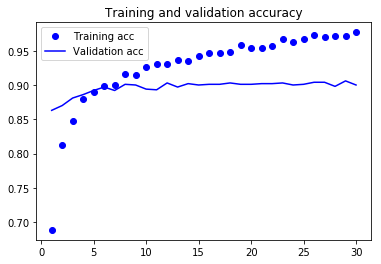

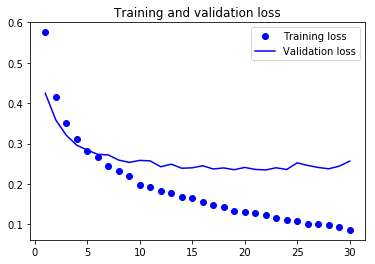

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Adding a densely connected classifier on top of the convolutional base

In [18]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [25]:
conv_base.trainable = False

In [26]:
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


#### Training the model end to end with a frozen convolutional base

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 90s 900ms/step - loss: 0.5704 - acc: 0.7305 - val_loss: 0.4468 - val_acc: 0.8210
Epoch 2/30
100/100 [==============================] - 88s 883ms/step - loss: 0.4787 - acc: 0.8000 - val_loss: 0.3644 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 89s 889ms/step - loss: 0.4212 - acc: 0.8145 - val_loss: 0.3263 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 89s 888ms/step - loss: 0.4030 - acc: 0.8190 - val_loss: 0.3035 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 89s 886ms/step - loss: 0.3821 - acc: 0.8300 - val_loss: 0.3084 - val_acc: 0.8700
Epoch 6/30
100/100 [==============================] - 89s 886ms/step - loss: 0.3637 - acc: 0.8395 - val_loss: 0.2995 - val_acc: 0.8700
Epoch 7/30
100/100 [==============================] - 88s 884ms/step - loss: 0.3605 - acc: 0.8405 - val_lo

In [42]:
model.save('cats_and_dogs_small_4.h5')

#### plotting the results

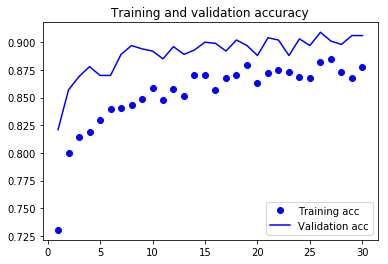

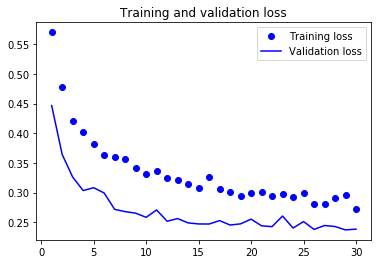

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_4.h5')

In [40]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8949999988079071


### Fine-tuning

In [43]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### Freezing all layers up to a specific one

In [44]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#### Fine-tuning the model

In [45]:
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
 24/100 [======>.......................] - ETA: 2:20 - loss: 0.4065 - acc: 0.8375

KeyboardInterrupt: 